<a href="https://colab.research.google.com/github/DonnaVakalis/Urban.dat/blob/master/canadian_cousins_research_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Cousin Cities</center></h1>

> A cluster analysis of Canadian municipalities by climate, demographics and urban patterns



in case it's useful: reference 'how to launch a dash app' in colab: https://stackoverflow.com/questions/53622518/launch-a-dash-app-in-a-google-colab-notebook

as well as here https://community.plotly.com/t/colab-and-easy-dash-sample/26799

and then quick example with iris dataset: https://plotly.com/python/line-and-scatter/

some inspiration:

https://groundrush.pythonanywhere.com/


## 0. Preamble (installs)

In [2]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

# Install plotlyExpress
!pip install plotly_express

!pip install geopandas


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,185 kB/s)
Selecting previously unselected

## 1. Import libraries and data sets



### 1.1 Import libraries

In [4]:
import pandas as pd
import numpy as np

import os
from google.colab import drive

import geopandas as gpd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf

from IPython.display import HTML #(then use HTML(fig.to_html()))
#import contextily as ctx

import seaborn as sns

from matplotlib import pyplot as plt

import plotly_express as px
 


### 1.2 Mount google drive

In [5]:
# mount google drive
drive.mount('/content/gdrive/')

root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
base_dir = root_dir + 'data_viz_club/'


Mounted at /content/gdrive/


### 1.3 Go get the data sets!

#### Data Provenance
Public Datasets Used:

Statistics Canada 2016 Census Data portal
Environment and Climate Change Canada Historic Weather 

Expanded Project Datasets (for inclusion later on):
 

In [4]:
# Read in data

# Read Pre-processed weather data--> Geopandas
# This file was processed separately. It contains the shapes of CSDs and the HDDS and CDDS for 2018 of nearest weather station 
filename = base_dir + 'raw_data_files/csd_with_nearest_weatherStation.pkl'
gdf_weather = pd.read_pickle(filename)

# Read in CSD Census Profiles
# From Statistics Canada 
filename = base_dir + 'raw_data_files/98-401-X2016042_English_CSV_data.csv'
gdf_weather = pd.read_csv(filename)

# Read in transportation data (includes population)

#23100286.csv

# Read in Remoteness Index

# 17100143.csv

In [ ]:
# Read in data

# Read Geography (Census Metro Areas + Census "Agglomerations"--> Geopandas
# from https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm
file = base_dir + 'raw_data_files/lcma000b16a_e.shp'
dat_cities = gpd.read_file(file)
dat_cities_geo = gpd.GeoDataFrame.from_file(file)

# Read land area 
# https://en.wikipedia.org/wiki/List_of_Canadian_census_agglomerations_by_province_or_territory#cite_note-7
file = base_dir + 'raw_data_files/cma_land_pop2016 - Sheet1.csv'
dat_dens = pd.read_csv(file)

# Read census profiles
# https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/download-telecharger/comp/page_dl-tc.cfm?Lang=E
file = base_dir + 'raw_data_files/98-401-X2016041_English_CSV_data.csv'
dat_census = pd.read_csv(file)

# Read remoteness index
# https://www150.statcan.gc.ca/n1/en/catalogue/17260001
file = base_dir + 'raw_data_files/2016IR_DATABASE.csv'
dat_rem = pd.read_csv(file)

# Read census dwelling types AND total population 
# from https://www12.statcan.gc.ca/datasets/Index-eng.cfm?Temporal=2016&Theme=-1&VNAMEE=&GA=3&S=0
file = base_dir + 'raw_data_files/census_dwellings_98-400-X2016014_English_CSV_data.csv'
dat_dwells = pd.read_csv(file, encoding="ISO-8859-1") # nrows=5162?

# Read census commuting and occupation 
# from https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Lp-eng.cfm?LANG=E&APATH=7&DETAIL=0&DIM=0&FL=C&FREE=0&GC=0&GID=0&GK=0&GRP=1&PID=0&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2016,2017&THEME=0&VID=0&VNAMEE=Commuting%20duration%20%286%29&VNAMEF=Dur%C3%A9e%20du%20trajet%20domicile%2Dlieu%20de%20travail%20%286%29
file = base_dir + 'raw_data_files/census_dwellings_98-400-X2016014_English_CSV_data.csv'
dat_mode = pd.read_csv(file, encoding="ISO-8859-1") # nrows=5162?

 


# Read Air Quality averages

# Cost of living

# Weather 
# download by province from https://climate-change.canada.ca/climate-data/#/climate-normals
file = base_dir + 'raw_data_files/climate-normals_alberta.csv'
dat_climate_alberta = pd.read_csv(file, encoding="ISO-8859-1") 


# Distances between places

# Comparison international cities



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



## Clean and tidy

#### clean up geo data


In [ ]:
# get geo dat, change esrg and geo_code to int

df_geo = dat_cities_geo[['CMAPUID',
                         'CMANAME',
                         'PRNAME',
                         'geometry']].rename(columns={'CMAPUID':'geo_code',
                         'CMANAME':'geo_name',
                         'PRNAME':'province'}).to_crs(epsg=3857)
df_geo['geo_code'] = df_geo['geo_code'].astype(int)

#### clean up census data


In [ ]:
df_census_0 = dat_census[['GEO_NAME',
                          'ALT_GEO_CODE',
                          'DIM: Profile of Census Metropolitan Areas/Census Agglomerations (2247)',
                          'Dim: Sex (3): Member ID: [1]: Total - Sex',
                          'Dim: Sex (3): Member ID: [2]: Male',
                          'Dim: Sex (3): Member ID: [3]: Female']].rename(columns={
                              'GEO_NAME' : 'geo_name',
                              'ALT_GEO_CODE' : 'geo_code',
                              'DIM: Profile of Census Metropolitan Areas/Census Agglomerations (2247)':'feature',
                              'Dim: Sex (3): Member ID: [1]: Total - Sex':'count_all',
                              'Dim: Sex (3): Member ID: [2]: Male' : 'count_male',
                              'Dim: Sex (3): Member ID: [3]: Female' : 'count_female'})  

features_of_interest = ['Population, 2016',
                   'Land area in square kilometres',
                   'Median age of the population',
                   'Total - Occupied private dwellings by structural type of dwelling - 100% data',
                   'Single-detached house',
                   'Apartment in a building that has five or more storeys',
                   'Average household size',
                   'Total - Knowledge of official languages for the total population excluding institutional residents - 100% data',
                   'Neither English nor French',
                   'Official language minority (percentage)',
                   'Total - Language spoken most often at home for the total population excluding institutional residents - 100% data',
                   'Non-official languages',
                   'Number of total income recipients aged 15 years and over in private households - 100% data',
                   'Median total income in 2015 among recipients ($)',
                   'Number of government transfers recipients aged 15 years and over in private households - 100% data',
                   'Composition of total income in 2015 of the population aged 15 years and over in private households (%) - 100% data',
                   'Market income (%)',
                   'Employment income (%)',
                   'Government transfers (%)',
                   'Total - Generation status for the population in private households - 25% sample data',
                   'First generation',
                   'Second generation',
                   'Total - Aboriginal identity for the population in private households - 25% sample data',
                   'Aboriginal identity',
                   'Total - Private households by tenure - 25% sample data',
                   'Owner',
                   'Renter',
                   'Band housing',
                   'Total - Occupied private dwellings by period of construction - 25% sample data',
                   '1960 or before',
                   '2011 to 2016',
                   'Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data',
                   'No certificate, diploma or degree',
                   'Secondary (high) school diploma or equivalency certificate',
                   'University certificate, diploma or degree at bachelor level or above',
                   'Degree in medicine, dentistry, veterinary medicine or optometry',
                   'Earned doctorate',
                   'Postsecondary certificate, diploma or degree',
                   'Same as province or territory of residence', #location of study
                   'Location of study outside Canada',
                   'Total - Population aged 15 years and over by Labour force status - 25% sample data',
                   'Participation rate',
                   'Unemployment rate',
                   'All occupations',
                   '0 Management occupations',
                   '1 Business, finance and administration occupations',
                   '2 Natural and applied sciences and related occupations',
                   '3 Health occupations',
                   '4 Occupations in education, law and social, community and government services',
                   '5 Occupations in art, culture, recreation and sport',
                   '6 Sales and service occupations',
                   '7 Trades, transport and equipment operators and related occupations',
                   '8 Natural resources, agriculture and related production occupations',
                   '9 Occupations in manufacturing and utilities',
                   'Total - Place of work status for the employed labour force aged 15 years and over in private households - 25% sample data',
                   'Worked at home',
                   'Worked outside Canada',
                   'No fixed workplace address',
                   'Worked at usual place',
                   'Total - Main mode of commuting for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data',
                   'Car, truck, van - as a driver',
                   'Car, truck, van - as a passenger',
                   'Public transit',
                   'Walked',
                   'Bicycle',
                   'Other method',
                   'Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data',
                   'Less than 15 minutes',
                   '60 minutes and over']

df_census_1 = df_census_0[df_census_0['feature'].isin(features_of_interest)]

In [ ]:
# need to convert feature and count columns to numeric types
cols = ['count_all', 'count_male','count_female']
df_census_1[cols] = df_census_1[cols].apply(pd.to_numeric, errors='coerce')
df_census_1a = df_census_1.pivot_table(index=['geo_name','geo_code'], columns='feature', values='count_all').reset_index()

# add row of means
avg = df_census_1a.mean() 
df_census_2 = df_census_1a.append(avg, ignore_index= True)
df_census_2.geo_name[df_census_2.geo_name.isnull()] = 'All_Cities_AVG'

In [ ]:
# check for scatter plot suitability

# Pick columns of interest and create additional features of interest...
df_census_2a = df_census_2.copy()
df_census_3 = pd.DataFrame()

df_census_3['geo_name'] = df_census_2a['geo_name']

# Demographics (age, education)
df_census_3['population_size'] = df_census_2a['Population, 2016']
df_census_3['age_median'] = df_census_2a['Median age of the population']
df_census_3['school_none'] = df_census_2a['No certificate, diploma or degree']/df_census_2a['Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data'] 
df_census_3['school_uni'] = df_census_2a['University certificate, diploma or degree at bachelor level or above']/df_census_2a['Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data'] 

# Jobs (Sectors and unemployment and pay)
df_census_3['work_unemployRate'] = df_census_2a['Unemployment rate'] 
df_census_3['workIn_agr'] = df_census_2a['8 Natural resources, agriculture and related production occupations']/df_census_2a['All occupations']
df_census_3['workIn_arts'] = df_census_2a['5 Occupations in art, culture, recreation and sport']/df_census_2a['All occupations']
df_census_3['workIn_biz'] = df_census_2a['1 Business, finance and administration occupations']/df_census_2a['All occupations']


# Urbanism (density, age)
df_census_3['pop_density'] = df_census_2a['Population, 2016']/df_census_2a['Land area in square kilometres']
df_census_3['trnsprt_walkBike'] = (df_census_2a['Walked']+df_census_2a['Bicycle']) /df_census_2a['Total - Main mode of commuting for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data']

df_census_3['trnsprt_commuteByCar'] = (df_census_2a['Car, truck, van - as a driver']+df_census_2a['Car, truck, van - as a passenger']) /df_census_2a['Total - Main mode of commuting for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data']

df_census_3['trnsprt_15minutes2work'] = df_census_2a['Less than 15 minutes']/df_census_2a['Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data'] 

df_census_3['bldgs_LiveInHouses'] = df_census_2a['Single-detached house']/df_census_2a['Total - Occupied private dwellings by structural type of dwelling - 100% data']
df_census_3['bldgs_LiveInAprtmnts'] = df_census_2a['Apartment in a building that has five or more storeys']/df_census_2a['Total - Occupied private dwellings by structural type of dwelling - 100% data']

# Culture (language, migration)
df_census_3['pop_1stGenImmigrant'] = df_census_2a['First generation']/df_census_2a['Total - Generation status for the population in private households - 25% sample data']
df_census_3['lang_notEnglishOrFrench'] = df_census_2a['Non-official languages']/df_census_2a['Total - Language spoken most often at home for the total population excluding institutional residents - 100% data']


In [ ]:
df_census_3.round(2)

,geo_name,population_size,age_median,school_none,school_uni,work_unemployRate,workIn_agr,workIn_arts,workIn_biz,pop_density,trnsprt_walkBike,trnsprt_commuteByCar,trnsprt_15minutes2work,bldgs_LiveInHouses,bldgs_LiveInAprtmnts,pop_1stGenImmigrant,lang_notEnglishOrFrench
0,Abbotsford - Mission,180518.00,39.40,0.15,0.14,6.5,0.05,0.02,0.13,297.33,0.04,0.92,0.33,0.45,0.02,0.27,0.20
1,Alma,32849.00,46.60,0.14,0.11,9.2,0.02,0.02,0.13,96.18,0.06,0.92,0.61,0.52,0.00,0.01,0.01
2,Arnprior,15973.00,47.70,0.12,0.12,6.8,0.03,0.02,0.15,59.42,0.06,0.91,0.35,0.70,0.01,0.05,0.02
3,Baie-Comeau,27692.00,47.00,0.17,0.10,8.8,0.01,0.02,0.12,40.07,0.06,0.92,0.58,0.58,0.01,0.01,0.01
4,Barrie,197059.00,39.70,0.13,0.15,7.2,0.02,0.02,0.14,219.44,0.04,0.91,0.28,0.69,0.06,0.14,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Wood Buffalo,73320.00,33.10,0.09,0.18,7.2,0.04,0.01,0.13,1.19,0.04,0.63,0.26,0.51,0.02,0.24,0.15
157,Woodstock,40902.00,41.90,0.17,0.11,5.3,0.02,0.02,0.13,835.25,0.07,0.91,0.51,0.58,0.08,0.12,0.05
158,Yellowknife,19569.00,34.50,0.11,0.28,5.9,0.02,0.03,0.18,185.54,0.22,0.70,0.67,0.45,0.05,0.17,0.11
159,Yorkton,18905.00,41.50,0.15,0.13,6.0,0.03,0.02,0.13,22.38,0.06,0.92,0.71,0.74,0.00,0.09,0.08


### create list of city names

In [ ]:
lst_cities = list(dat_cities.CMANAME) # 156 CMAs
lst_cities2 = list(dat_dens.GEO_NAME) # 120 all those for which I have population and land area

### clean up dwellings data


In [ ]:
# clean up and organize dwellings data: 

df_dwel_0 = dat_dwells[(dat_dwells.GEO_LEVEL==2) | (dat_dwells.GEO_LEVEL==3)][['ALT_GEO_CODE',
                                                                                'GEO_NAME',
                                                                                'DIM: Structural type of dwelling (10)',
                                                                                'Dim: Age (20): Member ID: [1]: Total - Age'
                                                                                ]].rename(columns={'ALT_GEO_CODE':'geo_code',
                                                                                                 'GEO_NAME':'geo_name',
                                                                                                 'DIM: Structural type of dwelling (10)':'dwell_type',
                                                                                                 'Dim: Age (20): Member ID: [1]: Total - Age':'dwell_count'})
# drop rows not in cities list 
df_dwel_1 = df_dwel_0[df_dwel_0['geo_name'].isin(lst_cities2)]
df_dwel_1

# create some new useful metrics (total, percentage single detached, percentage mobile)
df_dwel_2 = df_dwel_1.pivot_table(index=['geo_code','geo_name'], columns='dwell_type', values='dwell_count').reset_index().rename(columns={'Total - Structural type of dwelling':'total_homes'})
df_dwel_2['prct_singleDet'] = df_dwel_2['Single-detached house']/df_dwel_2['total_homes']
df_dwel_2['prct_tallBuild'] = df_dwel_2['Apartment in a building that has five or more storeys']/df_dwel_2['total_homes']
df_dwel_2['prct_mobHome'] = df_dwel_2['Movable dwelling']/df_dwel_2['total_homes']
df_dwel_2['total_homes'] = round(df_dwel_2['total_homes'])

df_dwells = df_dwel_2[['geo_code','geo_name','total_homes','prct_singleDet','prct_tallBuild','prct_mobHome']]

In [ ]:
df_dwells.head(2)

*italicized text*## PLOTS and MAPS


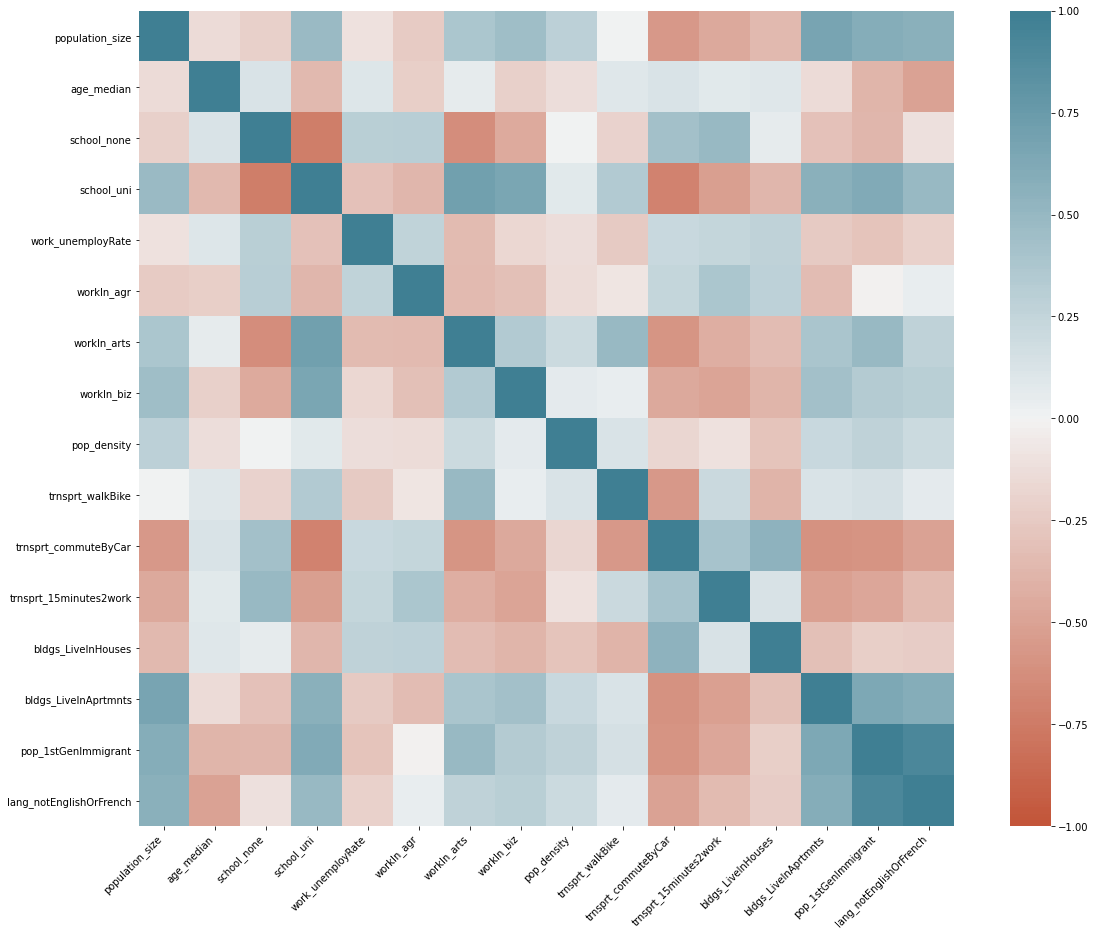

In [ ]:
# Heatmap of correlations 
# Later revisit this and improve: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
corr = df_census_3.corr()
plt.subplots(figsize=(20,15))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)



ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# check for place & feature combination where counts female and counts male are very different
df_census_3b = df_census_1.copy()
df_census_3b['prct_diff_female2male']= ((df_census_3b['count_female']-df_census_3b['count_male'])/df_census_3b['count_all']).replace([np.inf, -np.inf], np.nan)

 # look at place & feature combinations with biggest discrepancy:
df_census_3b.sort_values(by=['prct_diff_female2male']).head(50) 

# grab median income difference as a percentage of local median
prct_diff_female2male = df_census_3b[df_census_3b['feature']=='Median total income in 2015 among recipients ($)'][['geo_code','prct_diff_female2male']] 

# visualize in plotly; cartographically 
prct_diff_female2male

df_forplotting = df_geo.merge(prct_diff_female2male,
                              left_on='geo_code',
                              right_on='geo_code')

# df_census_3b.sort_values(by=['prct_diff_female2male']).head(50)


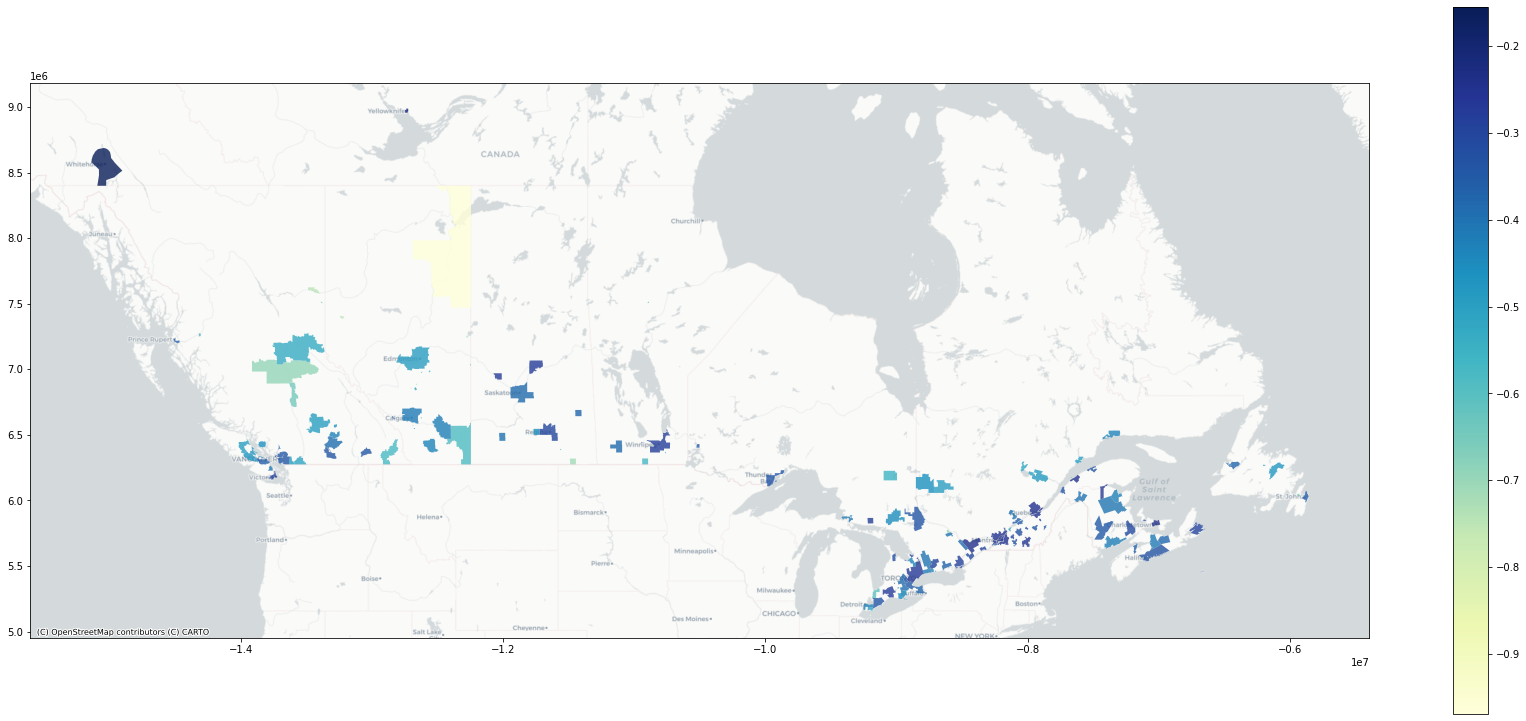

In [ ]:
#plot merged file. use dropna to remove any country with no revenue value
ax = df_forplotting.dropna().plot(column='prct_diff_female2male', cmap =    
                                'YlGnBu', alpha=1.0, figsize=(30,13), k=3, legend =  
                                  True);

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

## Clustering


In [ ]:
# Convert to numpy array

# example X = df[['fuel_energy', 'solar_energy', 'hydro_fuel']].values# Transform the data


# Normalize and standardize the features columns



In [3]:
# Clustering and re-append the names of CSDs

# example https://www.analyticsvidhya.com/blog/2020/11/introduction-to-clustering-in-python-for-beginners-in-data-science/
 
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=5)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
combine['cluster'] = cluster

### Population Density and Prevalance of Single Detached Houses

In [ ]:
alt.Chart(df_census_3).mark_point().encode(
    x='trnsprt_commuteByCar',
    y='bldgs_LiveInHouses',
    color='pop_density',
).interactive().properties(
    width=800,
    height=500
)

alt.Chart(...)

In [ ]:
fig = px.scatter(df_census_3, x="trnsprt_commuteByCar", y="bldgs_LiveInHouses", color="pop_density",
                 size='age_median', hover_data=['geo_name'])
fig.show()

### Percentage population working in the arts versus percentage who commute by active transportation

In [ ]:
alt.Chart(df_census_3).mark_point().encode(
    x='trnsprt_commuteByCar',
    y='bldgs_LiveInHouses',
    color='pop_density',
).interactive().properties(
    width=800,
    height=500
)

## Setup Comparison Global Municipalities...